Домашняя работа по вычислительной математике, задание 2.

Выполнил: Вязовцев Андрей Викторович, Б01-009


Система Лоренца:

$ x' = x(1 - 0.5x - \frac{2}{\alpha^2}y)$

$ y' = y(2\alpha - 3.5\alpha^2 x - 0.5y$

$ a' = \varepsilon (2 - 7\alpha x)$

При

$\varepsilon \leqslant 0.01$

$0 \leqslant x_0 \leqslant 3$

$0 \leqslant y_0 \leqslant 15$

$0 < \alpha_0 << 1$

$T_k = 1500$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
eps = 1e-3
diff_x = lambda t, x, y, a: x * (1.0 - 0.5 * x - y / 3.5 / a / a)
diff_y = lambda t, x, y, a: y * (2.0 * a - 3.5 * a * a * x - 0.5 * y)
diff_a = lambda t, x, y, a: eps * (2.0 - 7.0 * a * x)

t_start = 0.0
t_end = 1500.0
x_0 = 2
y_0 = 5
a_0 = 1e-6

diff_w = lambda t, w: np.array([diff_x(t, *w), diff_y(t, *w), diff_a(t, *w)])
w_0 = np.array([x_0, y_0, a_0])

jacobian = lambda t, w: np.array([
        [1.0 - w[0] - w[1] / (3.5 * w[2] * w[2]), 
         -w[0] / (3.5 * w[2] * w[2]),
         4.0 * w[0] * w[1] / (7.0 * np.power(w[2], 3))],
        [-3.5 * w[1] * w[2] * w[2],
         2.0 * w[2] - 3.5 * w[2]* w[2] * w[0] - w[1],
         w[1] * (2.0 - 7.0 * w[2] * w[0])],
        [eps * (-7.0 * w[2]),
         0.0,
         eps * (-7.0 * w[0])]
         ])

In [3]:
t_plt = []
x_plt = []
y_plt = []
a_plt = []

def PltClear():
    t_plt.clear()
    x_plt.clear()
    y_plt.clear()
    a_plt.clear()

def PltAppend (t, w):
    t_plt.append(t)
    x_plt.append(w[0])
    y_plt.append(w[1])
    a_plt.append(w[2])

def Print (t, x, str):
    plt.rc ('font', size = 13)
    fig = plt.figure(figsize = (10, 10))
    ax  = fig.add_subplot(1,1,1)
    ax.plot (t, x)
    ax.set_xlabel ('t',  fontsize = 20)
    ax.set_ylabel (str, fontsize = 20)
    
def Print3D():
    plt.rc ('font', size = 13)
    fig = plt.figure(figsize = (7, 7))
    ax = fig.add_subplot(projection='3d')
    ax.plot (x_plt, y_plt, a_plt)
    
def PrintAll():
    Print (t_plt, x_plt, "x")
    Print (t_plt, y_plt, "y")
    Print (t_plt, a_plt, "a")
    Print3D()

## Решение с помощью неявного метода Розенброка 4 порядка

Источник: https://cyberleninka.ru/article/n/l-ustoychivyy-4-2-metod-chetvertogo-poryadka-dlya-resheniya-zhestkih-zadach/viewer (см. 3.1)

In [12]:
a1 = 0.5728160624821
a_pow_3 = np.power (a1, 3)
p1 = (76.0 - 29.0 / a1 + 3.0 / a_pow_3) / 27.0
p2 = (-146.0 + 89.0 / a1 - 12.0 / a_pow_3) / 27.0
p3 = (32.0 - 4.0 / a1) / 27.0
p4 = (4.0 / a1 - 16.0) / 27.0
b31 = (48.0 - 9.0 / a1) / 32.0
b32 = (9.0 / a1 - 24.0) / 32.0
a32 = (-54.0 * a1 + 57.0 - 12.0 / a1) / (8.0 - 32.0 * a1)
a42 = (-864.0 * a1 * a1 + 828.0 * a1 - 288.0 + 36.0 / a1) / np.power (4.0 - 16.0 * a1, 2)

E = np.array([[1.0, 0.0, 0.0],
              [0.0, 1.0, 0.0],
              [0.0, 0.0, 1.0]])

def GetNextW (h, t, w):
    D = E - a1 * h * jacobian(t, w)
    k1 = np.linalg.solve (D, h * diff_w (t, w))
    k2 = np.linalg.solve (D, k1)
    k3 = np.linalg.solve (D, h * diff_w (t, w + b31 * k1 + b32 * k2) + a32 * k2)
    k4 = np.linalg.solve (D, k3 + a42 * k2)
    return w + p1 * k1 + p2 * k2 + p3 * k3 + p4 * k4

def GetW (h):
    w = w_0
    t_i = t_start
    PltClear()
    PltAppend (t_i, w)
    while t_i <= t_end:
        w = GetNextW (h, t_i, w)
        t_i += h
        PltAppend (t_i, w)
    PrintAll()
    return w

h = 1e-4:  [0.         2.90311212 0.7271585 ]


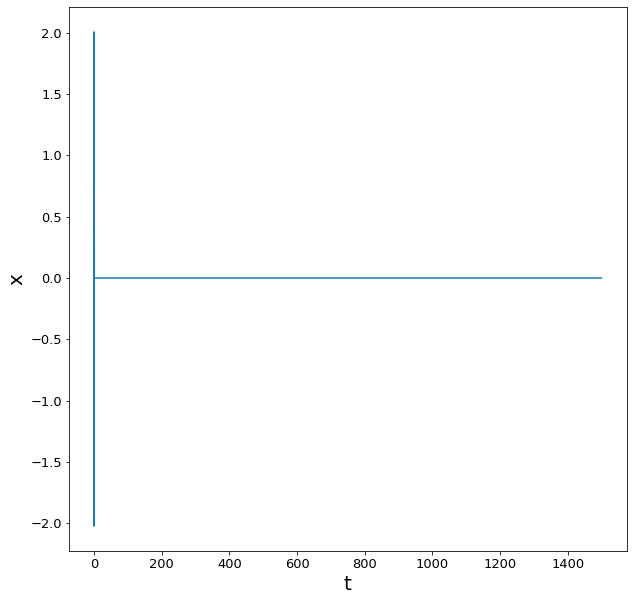

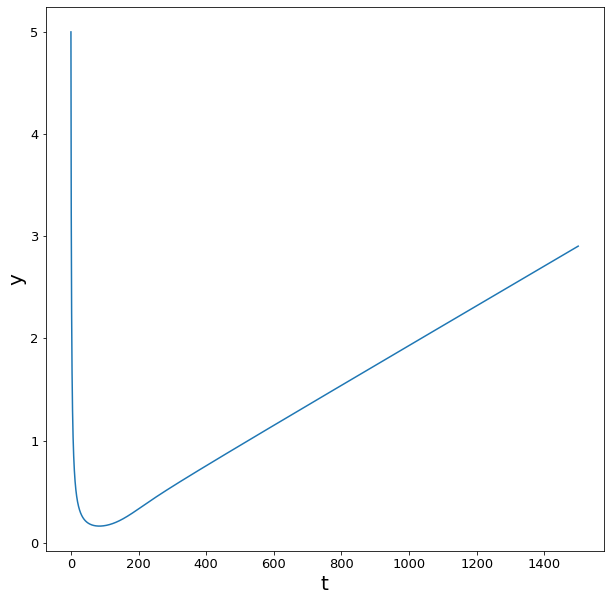

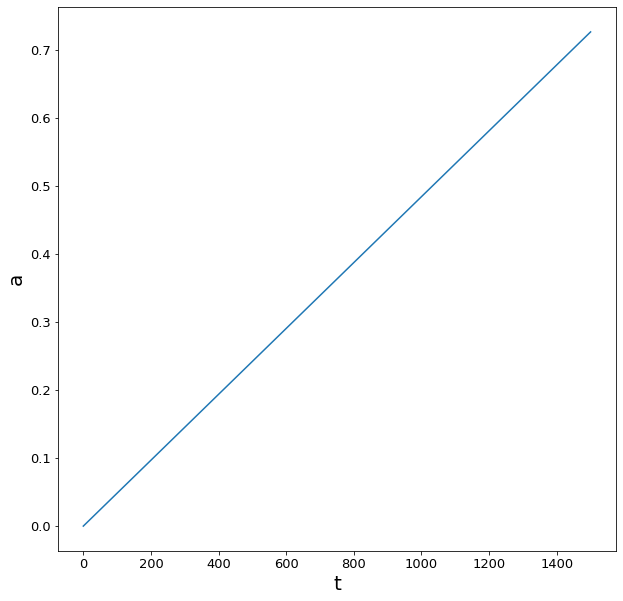

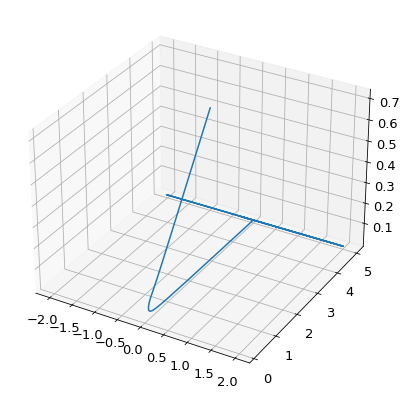

In [18]:
print ("h = 1e-4: ", GetW (1e-4))

С x что-то странное произошло, но остальное выглядит красиво, будто метод сошёлся.